
<h1><b><font color="brown">Red-Wine Quality Prediction System</font></b></h1>
<p>dataset taken by <q><font color="green">kaggle</font></q>.<p>
<h2>Steps involved</h2>
<ol>
    <li>data collection and Quality check</li>
    <li>data cleaning</li>
    <li>data imputation</li>
    <li>data modeling</li>
    <li>data evaluation</li>
    <li>Predict Final value by code</li>
</ol>

    
    

   


<h2><font color="brown">Data collection and Quality check</font></h2>
<p>imported dateset and converting it to dataframe</p>


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
# The code was removed by Watson Studio for sharing.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<p><font color="#999900">done</font></p>
<p><font color="#999900">checking</font>:is there any missing value in dataframe</p>

In [44]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<p><font color="#999900">done</font>,no missing value found</p>
<p><font color="#999900">checking</font>: for datatype</p>

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<p><font color="#999900">done</font>,all are in float</p>
<p>I found no missing values so <font color="green">no mining </font>required</p>
<p><font color="#999900">Plot</font>: Barplots of all the coloumns</p>
 <p>Here i have called the FOR-LOOP so that it will run automatically all the plots of the given coloumns respective wise</p>


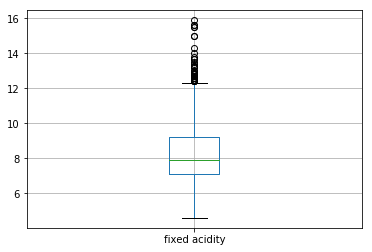

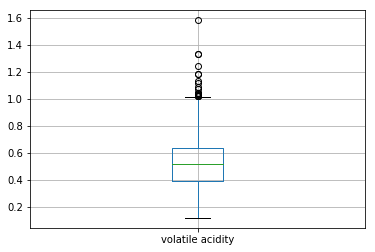

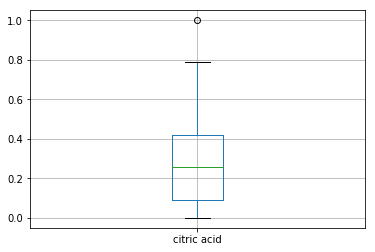

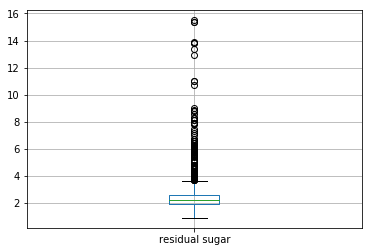

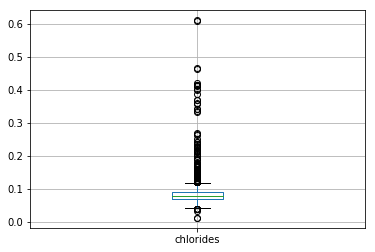

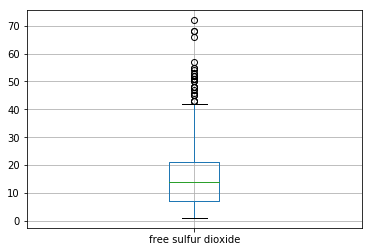

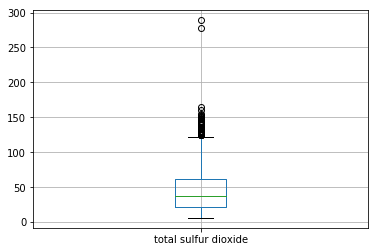

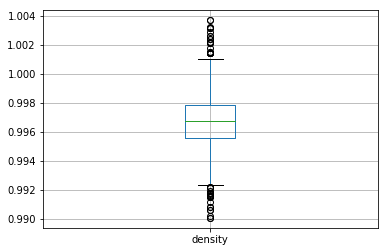

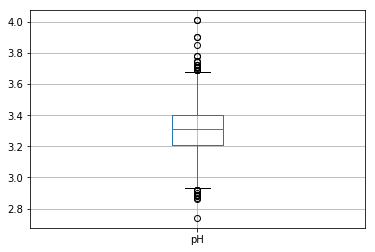

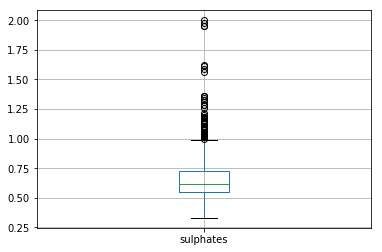

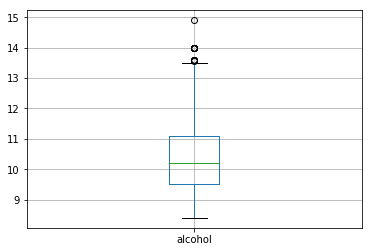

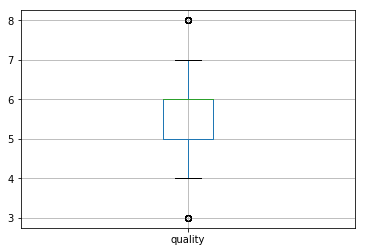

<Figure size 432x288 with 0 Axes>

In [46]:
for i in df:
    df.boxplot([i])
    plt.figure()


<p><font color="#999900">Plot</font>:histograms of all the coloumns</p>
<p>Here i have again called the FOR-LOOP so that it will run automatically all the plots of the given coloumns respectively and divided range into interval of 10</p>

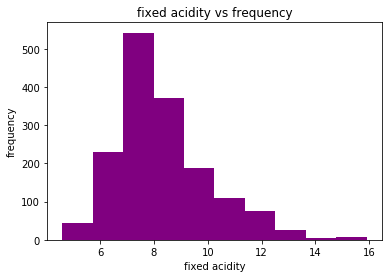

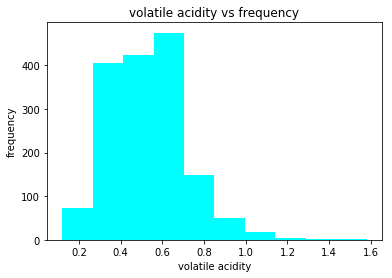

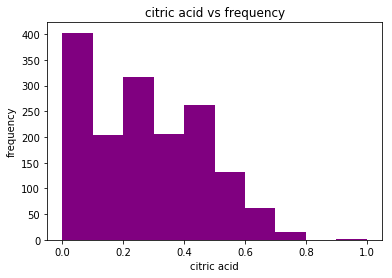

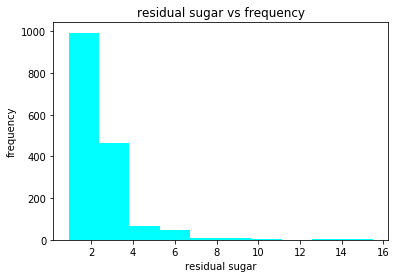

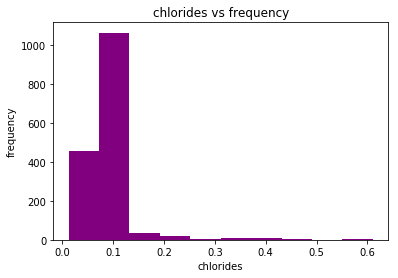

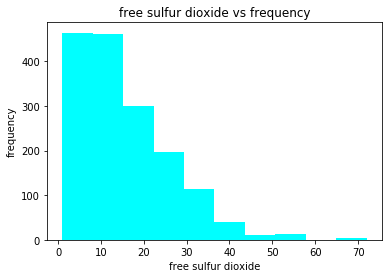

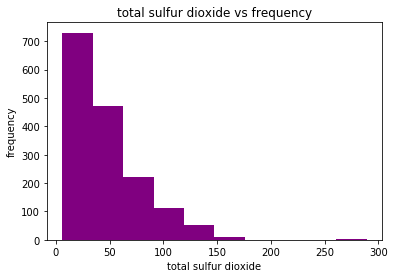

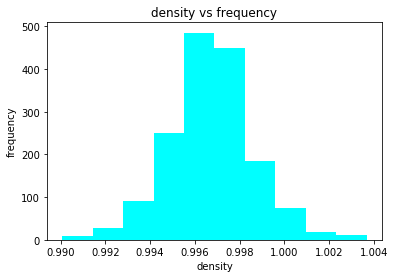

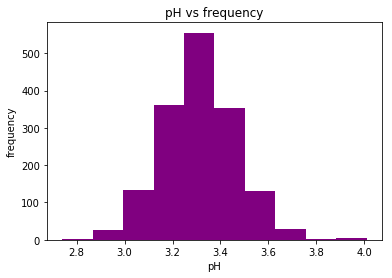

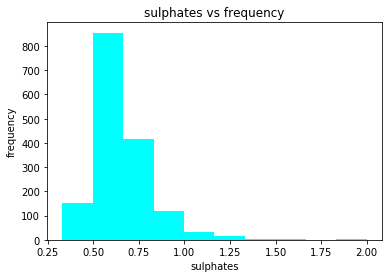

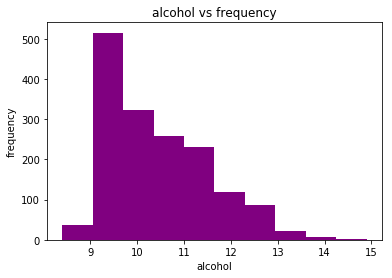

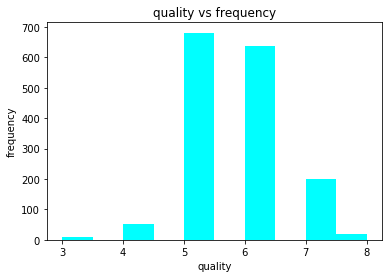

In [47]:
l=["purple","cyan","purple","cyan","purple","cyan","purple","cyan","purple","cyan","purple","cyan"]
j=0
for i in df:
    d=df[i]
    bins=10
    plt.hist(d,bins,color=l[j])
    plt.title(f"{i} vs frequency")
    plt.xlabel(i)
    plt.ylabel("frequency")
    j+=1
    plt.show()

<p><font color="#999900">Plot</font>:scattered graph using matplotlib</p>
<p>Try to identify the relation</p>


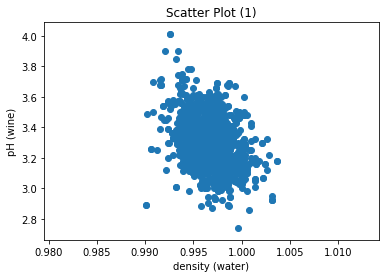

In [48]:
d = df["density"]
ph = df["pH"]

plt.scatter(d, ph)
plt.title("Scatter Plot (1)")
plt.xlabel("density (water)")
plt.ylabel("pH (wine)")
plt.show()

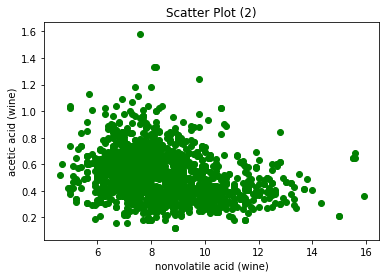

In [49]:
fa = df["fixed acidity"]
va = df["volatile acidity"]

plt.scatter(fa, va,color = 'green')
plt.title("Scatter Plot (2)")
plt.xlabel("nonvolatile acid (wine)")
plt.ylabel("acetic acid (wine)")
plt.show()

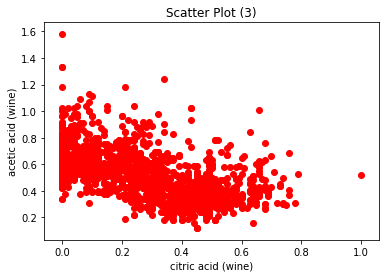

In [50]:
ca = df["citric acid"]
va = df["volatile acidity"]

plt.scatter(ca, va,color = 'red')
plt.title("Scatter Plot (3)")
plt.xlabel("citric acid (wine)")
plt.ylabel("acetic acid (wine)")
plt.show()

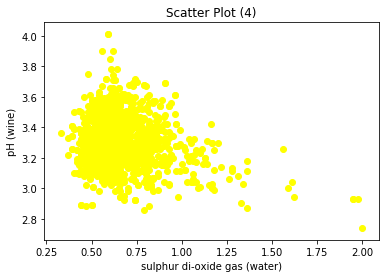

In [51]:
sl = df["sulphates"]
ph = df["pH"]

plt.scatter(sl, ph,color = 'yellow')
plt.title("Scatter Plot (4)")
plt.xlabel("sulphur di-oxide gas (water)")
plt.ylabel("pH (wine)")
plt.show()

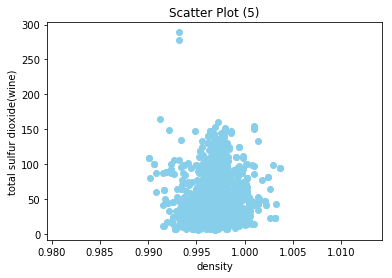

In [52]:
fsd = df["density"]
tsd = df["total sulfur dioxide"]

plt.scatter(fsd, tsd,color = 'skyblue')
plt.title("Scatter Plot (5)")
plt.xlabel("density")
plt.ylabel("total sulfur dioxide(wine)")
plt.show()

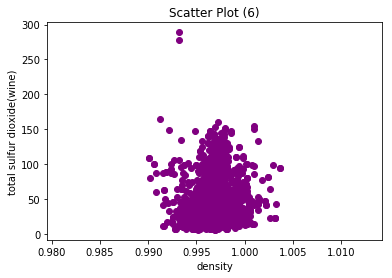

In [53]:
fsd = df["density"]
tsd = df["total sulfur dioxide"]

plt.scatter(fsd, tsd,color = 'purple')
plt.title("Scatter Plot (6)")
plt.xlabel("density")
plt.ylabel("total sulfur dioxide(wine)")
plt.show()

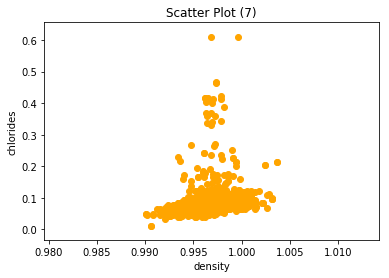

In [54]:
fsd = df["density"]
tsd = df["chlorides"]

plt.scatter(fsd, tsd,color = 'orange')
plt.title("Scatter Plot (7)")
plt.xlabel("density")
plt.ylabel("chlorides")
plt.show()

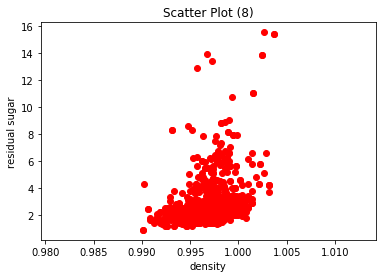

In [55]:
fsd = df["density"]
tsd = df["residual sugar"]

plt.scatter(fsd, tsd,color = 'red')
plt.title("Scatter Plot (8)")
plt.xlabel("density")
plt.ylabel("residual sugar")
plt.show()

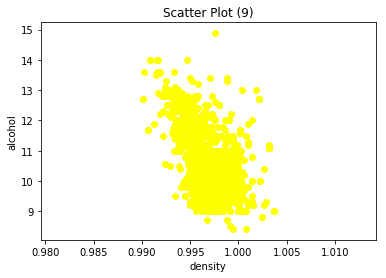

In [56]:
fsd = df["density"]
tsd = df["alcohol"]

plt.scatter(fsd, tsd,color = 'yellow')
plt.title("Scatter Plot (9)")
plt.xlabel("density")
plt.ylabel("alcohol")
plt.show()

<p>from this histogram and boxplot,we have to drop some values</p>
<h2><font color="brown">Data Cleaning</font></h2>

In [57]:
df[df.quality>7]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [58]:
df[ df.quality<4]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3



<h2><font color="brown">Data Imputation </font></h2>
<p><font color="#999900">No null vales in dataset</font> , <font color="green"> No major manupulation required.</font></p>

In [59]:
df['quality']=df['quality'].apply(lambda x:float(x))

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null float64
dtypes: float64(12)
memory usage: 150.0 KB


<p><font color="#999900">  Done</font>,now each datatype is float.</p>

<h2><font color="brown">    Data Modelling</font></h2>
<ul>I have used <font color="#999900">Two</font> things for modeling;
      <li>KNNregressor</li>
      <li>Random Forest</li></ul>
<p>1.Here I have taken list(features) which will help us to examine the quality of the certain Wine.</p>

In [61]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

x = df[features]
y = df['quality'] 

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier


<p>spliting the dataset,<font color="#999900">for traing and testing</font></p>

In [63]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20 , random_state=42)

In [64]:
Knn = KNeighborsClassifier (n_neighbors=7,p=1)
Knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=1,
           weights='uniform')

In [65]:
y_pred=Knn.predict(test_x)
for i in range(len(y_pred)):
    print(y_pred[i].mean())


5.0
5.0
6.0
6.0
6.0
6.0
5.0
5.0
5.0
5.0
6.0
5.0
6.0
6.0
6.0
5.0
5.0
5.0
6.0
5.0
5.0
6.0
5.0
7.0
5.0
6.0
5.0
6.0
5.0
6.0
5.0
5.0
5.0
5.0
6.0
5.0
6.0
6.0
6.0
6.0
6.0
5.0
5.0
5.0
5.0
6.0
7.0
6.0
5.0
6.0
5.0
5.0
5.0
5.0
5.0
5.0
6.0
5.0
6.0
6.0
5.0
5.0
6.0
5.0
6.0
6.0
7.0
5.0
6.0
6.0
5.0
5.0
6.0
6.0
6.0
5.0
5.0
5.0
6.0
5.0
5.0
5.0
7.0
5.0
6.0
6.0
5.0
6.0
6.0
5.0
5.0
5.0
6.0
5.0
5.0
6.0
5.0
5.0
5.0
6.0
5.0
5.0
5.0
6.0
6.0
6.0
5.0
5.0
5.0
5.0
6.0
5.0
6.0
5.0
6.0
5.0
5.0
5.0
5.0
6.0
5.0
5.0
6.0
5.0
5.0
5.0
6.0
6.0
5.0
6.0
6.0
6.0
5.0
7.0
6.0
5.0
6.0
5.0
5.0
6.0
6.0
6.0
6.0
6.0
5.0
5.0
6.0
6.0
5.0
5.0
5.0
6.0
5.0
5.0
6.0
6.0
6.0
7.0
6.0
6.0
5.0
5.0
5.0
5.0
6.0
6.0
5.0
5.0
5.0
5.0
5.0
5.0
7.0
6.0
5.0
5.0
4.0
5.0
5.0
7.0
6.0
6.0
5.0
6.0
5.0
6.0
5.0
5.0
7.0
6.0
6.0
7.0
6.0
6.0
5.0
5.0
6.0
5.0
7.0
6.0
5.0
5.0
5.0
6.0
6.0
5.0
5.0
5.0
6.0
5.0
5.0
5.0
6.0
6.0
6.0
6.0
6.0
6.0
5.0
5.0
6.0
5.0
5.0
6.0
6.0
6.0
6.0
7.0
5.0
5.0
5.0
5.0
7.0
5.0
7.0
6.0
5.0
6.0
5.0
5.0
6.0
5.0
6.0
6.0
5.0
5.0
5.0
5.0
7.0
5.0


In [66]:
test_y

803     6.0
124     5.0
350     6.0
682     5.0
1326    6.0
976     5.0
1493    5.0
706     5.0
613     5.0
1587    6.0
513     7.0
1505    3.0
1525    5.0
1568    5.0
220     6.0
1010    7.0
30      5.0
942     7.0
481     8.0
135     5.0
65      5.0
99      6.0
1547    5.0
1311    6.0
29      6.0
745     6.0
538     7.0
168     6.0
274     5.0
271     6.0
       ... 
1244    6.0
1120    8.0
544     6.0
1262    5.0
192     5.0
968     6.0
63      5.0
874     7.0
965     6.0
1106    6.0
650     5.0
615     5.0
857     7.0
528     6.0
628     6.0
218     5.0
1175    6.0
286     6.0
1287    5.0
950     7.0
1342    6.0
1073    6.0
1314    6.0
597     6.0
485     5.0
1259    6.0
1295    5.0
1155    5.0
963     6.0
704     4.0
Name: quality, Length: 320, dtype: float64

In [67]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


In [68]:
# mean_squared_error(test_y,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.496875

In [69]:
print("Wrong values predicted out of total values : ")
print((test_y!=y_pred).sum(),'/',((test_y==y_pred).sum()+(test_y!=y_pred).sum()))

Wrong values predicted out of total values : 
161 / 320


<p>Now by<font color="#999900"> Random Forest</font> </p>

In [70]:
i=197
tree=RandomForestClassifier(n_estimators=i, random_state=42)
tree.fit(train_x,train_y)
y_pred=tree.predict(test_x)
print(i,'=',accuracy_score(test_y,y_pred))

197 = 0.659375


In [71]:
tree=RandomForestClassifier(n_estimators=i, random_state=42)
tree.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=197, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

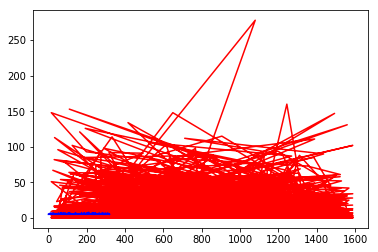

In [72]:

plt.plot(test_x,color='r')
plt.plot(y_pred,color='b')
plt.show()

In [73]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<p><h2><font color="brown">Predict Final value by code</font></h2></p>

In [74]:
!pip install watson-machine-learning-client

In [75]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [76]:

wml_credentials={
  "apikey": "NwKFHhiv--hhRhPznxOX06JAlfmvCn6dcEjqfTHmxAdB",
  "instance_id": "ee7d8aa4-7767-4274-ae7d-8d556248b952",
  "url": "https://eu-gb.ml.cloud.ibm.com",
}


In [77]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [78]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Shraddha", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "k.shraddha2011@gmail.com", 
               client.repository.ModelMetaNames.NAME: "x"}


In [79]:
model_artifact =client.repository.store_model(tree, meta_props=model_props)


In [80]:

published_model_uid = client.repository.get_model_uid(model_artifact)

In [81]:

published_model_uid

'969107d0-e5b0-4784-b3e7-0f9bb22e0545'

In [82]:
deployment = client.deployments.create(published_model_uid, name="x")



#######################################################################################

Synchronous deployment creation for uid: '969107d0-e5b0-4784-b3e7-0f9bb22e0545' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c3259be1-a326-4054-a435-8ad0392305ef'
------------------------------------------------------------------------------------------------




In [83]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [84]:

scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ee7d8aa4-7767-4274-ae7d-8d556248b952/deployments/c3259be1-a326-4054-a435-8ad0392305ef/online'